In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df_premier = pd.read_csv('cleaned_data\Premier_league.csv')
df_premier.head()

,Unnamed: 0,Team_1,Team_2,League_Rank_1,League_Rank_2,Games_played_1,Games_played_2,Points_1,Points_2,Won_1,...,Average_HT_Goal,Results_1,Results_2,H2H_Side,H2H_Outcome,H2H_Goals_Home,H2H_Goals_Away,Goals_scored_diff,Goals_Rec_diff,Goals_Diff_diff
0,0,manchester c,liverpool,3,1,20,20,47,54,15,...,1.33,2,1,A,D,0,0,6,8,-2
1,1,newcastle,manchester u,15,6,20,20,18,35,4,...,1.33,0,2,A,L,2,3,-26,-5,-21
2,2,brighton,liverpool,13,1,21,21,26,54,7,...,1.80,0,1,A,L,0,1,-25,19,-44
3,3,manchester united,brighton and hove albion,6,13,22,22,41,26,12,...,1.25,2,1,A,L,2,3,20,2,18
4,4,chelsea,newcastle,4,15,21,21,44,18,13,...,1.66,2,1,A,W,2,1,23,-13,36


In [37]:
df_premier.columns

Index(['Unnamed: 0', 'Team_1', 'Team_2', 'League_Rank_1', 'League_Rank_2',
       'Games_played_1', 'Games_played_2', 'Points_1', 'Points_2', 'Won_1',
       'Draw_1', 'Lost_1', 'Won_2', 'Draw_2', 'Lost_2', 'Goals_Scored_1',
       'Goals_Scored_2', 'Goals_Rec_1', 'Goal_Rec_2', 'Goals_Diff_1',
       'Goals_Diff_2', 'League_type_country', 'Large_Diff_win', 'Won_out_of_6',
       'Avrage_FT_Goal', 'Average_HT_Goal', 'Results_1', 'Results_2',
       'H2H_Side', 'H2H_Outcome', 'H2H_Goals_Home', 'H2H_Goals_Away',
       'Goals_scored_diff', 'Goals_Rec_diff', 'Goals_Diff_diff'],
      dtype='object')

In [52]:
#df_premier.describe(include=['Results_1', 'Results_2', 'Goals_scored_diff', 'Goals_Rec_diff', 'Goals_Diff_diff'])
#df_premier['Results_1', 'Results_2', 'Goals_scored_diff', 'Goals_Rec_diff', 'Goals_Diff_diff'].describe()

KeyError: ('Results_1', 'Results_2', 'Goals_scored_diff', 'Goals_Rec_diff', 'Goals_Diff_diff')

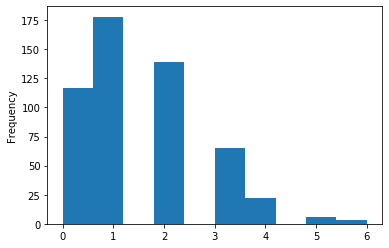

In [40]:
df_premier['Results_1'].plot.hist()

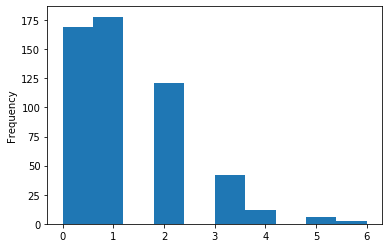

In [41]:
df_premier['Results_2'].plot.hist()

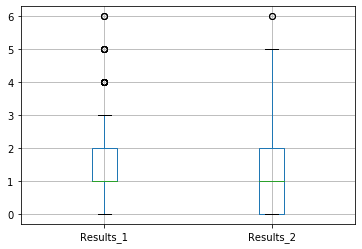

In [42]:
df_premier.boxplot(column = ['Results_1', 'Results_2'])

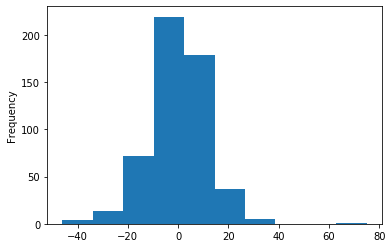

In [44]:
df_premier['Goals_scored_diff'].plot.hist()

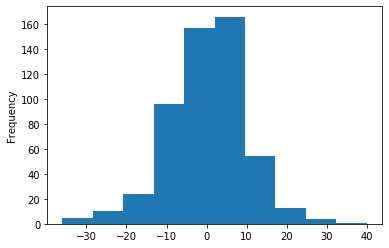

In [45]:
df_premier['Goals_Rec_diff'].plot.hist()

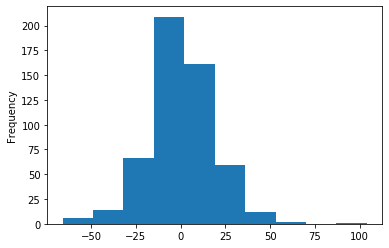

In [46]:
df_premier['Goals_Diff_diff'].plot.hist()

**EDA Observations**

As we can see, the final score for the Home Team ('Results_1') is greater than the Away Team ('Results_2') which matches with the initial prediction. This means that, in average, the Home Team has a greater advantage compared to the Away side when it comes to winning a match, which can determine how the fanbase and stadium might affect a team's performance when playing. 

Looking at the histograms, we can see how the final goals scored by the Home Team is in average greater than the Away Team. We can see that the Result for of one goal for the Home Team is about the same frequency as the Away Team, but the distribution for more than one goal is less while for zero goals is way higher for the Away Team.

For the boxplots, we can see that IQR for the Home Team (Results_1) is smaller in size but greater in value, ranging from 1 to 2, while the Away Team (Results_2) is greater in size but in value it ranges from 0 to 2. This matches with the great frequency of zeros shown in the histogram, as well as the Quartile 1 for the Away Team to be at zero. Given that the Away Team has a bigger IQR, the Maximum is the box plot is bigger than the Home Team, which leads to outliers only at 6 goals, while the Home Team's outliers are considered 4, 5 and 6 goals. However, we will not be rulling out outliers in this model.
